In [32]:
# Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles

# 1 Data import

In [33]:
# IMPORT raw data from deg (Rstudio)
deg_na = pd.read_csv('10_3_deg_lncRNA_interactionpartners/comp_anoxia_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Anoxia').rename(columns={'Unnamed: 0': 'gene_id'})
deg_nr = pd.read_csv('10_3_deg_lncRNA_interactionpartners/comp_reoxygenation_normoxia.csv', header=0, sep=',').assign(regulation='up', condition='Normoxia to Reoxygenation').rename(columns={'Unnamed: 0':'gene_id'})
deg_ar = pd.read_csv('10_3_deg_lncRNA_interactionpartners/comp_anoxia_reoxygenation.csv', header=0, sep=',').assign(regulation='up', condition='Anoxia to Reoxygenation').rename(columns={'Unnamed: 0':'gene_id'})

# identified lncRNA Interaction partners
ip = pd.read_csv('10_3_deg_lncRNA_interactionpartners/delncrna_interaction_partners.txt', sep='\t')

In [34]:
# drop rows that contains NaN in the padj column 
deg_na = deg_na.dropna(subset=['padj'])
deg_nr = deg_nr.dropna(subset=['padj'])
deg_ar = deg_ar.dropna(subset=['padj'])

# filter for NaN in log2FoldChange column 
deg_na = deg_na.dropna(subset=['log2FoldChange'])
deg_nr = deg_nr.dropna(subset=['log2FoldChange'])
deg_ar = deg_ar.dropna(subset=['log2FoldChange'])

In [35]:
ip

,isBest,lncRNA_gene,lncRNA_transcript,partnerRNA_gene,partnerRNA_transcript,direction,type,distance,subtype,location,subset,adjusted_distance_kb
0,1,STRG.42763,STRG.42763.2,ccar_ua23-g21278,ccar_ua23-g21278.t1,sense,intergenic,5638,same_strand,downstream,deg lncRNA,-5.638
1,1,STRG.46948,STRG.46948.4,ccar_ub01-g23318,ccar_ub01-g23318.t2.1.6676f649,antisense,intergenic,73199,divergent,upstream,deg lncRNA,73.199
2,1,STRG.72209,STRG.72209.4,ccar_ub15-g36988,ccar_ub15-g36988.t1,antisense,intergenic,9014,divergent,upstream,deg lncRNA,9.014
3,1,STRG.22491,STRG.22491.2,ccar_ua11-g10839,ccar_ua11-g10839.t1,antisense,genic,0,overlapping,exonic,deg lncRNA,0.000
4,1,STRG.53824,STRG.53824.2,ccar_ub04-g27262,ccar_ub04-g27262.t1,sense,intergenic,8838,same_strand,downstream,deg lncRNA,-8.838
...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1,STRG.9211,STRG.9211.2,ccar_ua04-g4523,ccar_ua04-g4523.t1,sense,intergenic,47722,same_strand,upstream,deg lncRNA,47.722
2273,1,STRG.38716,STRG.38716.2,ccar_ua20-g18961,ccar_ua20-g18961.t1,antisense,intergenic,619,convergent,downstream,deg lncRNA,-0.619
2274,1,STRG.44282,STRG.44282.2,ccar_ua24-g21900,ccar_ua24-g21900.t1,sense,intergenic,23992,same_strand,upstream,deg lncRNA,23.992
2275,1,STRG.72738,STRG.72738.8,ccar_ub15-g37341,ccar_ub15-g37341.t1,antisense,intergenic,4219,convergent,downstream,deg lncRNA,-4.219


In [36]:
deg_na

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,regulation,condition
0,scaffold_1-g45517,0.907280,1.530707,1.417355,0.812920,0.416264,0.906746,up,Normoxia to Anoxia
1,scaffold_1-g45522,1.220726,-1.717516,1.306545,-1.024843,0.305437,0.705998,up,Normoxia to Anoxia
2,scaffold_1-g45527,2.889031,0.210927,0.782308,0.000000,1.000000,1.000000,up,Normoxia to Anoxia
4,scaffold_1-g45532,6.305233,-0.670895,0.416676,-0.701703,0.482864,1.000000,up,Normoxia to Anoxia
6,scaffold_1-g45534,0.984423,1.019967,1.185473,0.541097,0.588441,1.000000,up,Normoxia to Anoxia
...,...,...,...,...,...,...,...,...,...
40732,scaffold_72-g45760,22.203994,0.788176,0.241229,1.698242,0.089462,0.248017,up,Normoxia to Anoxia
40733,scaffold_86-g45770,198.866015,0.594587,0.137687,1.569323,0.116573,0.312900,up,Normoxia to Anoxia
40734,scaffold_129-g45565,5.489499,-0.755224,0.621846,-0.605796,0.544650,1.000000,up,Normoxia to Anoxia
40735,scaffold_129-g45566,3.506381,0.241384,0.611682,0.000000,1.000000,1.000000,up,Normoxia to Anoxia


In [37]:
# set threshold for fold change 
fold_threshold = 1.3 
p_threshold = 0.05

# 2 Vulcano DEG and lncRNA 

In [38]:
# merge the dataframes and add column with name of comparison
deg = pd.concat([deg_na, deg_nr, deg_ar])

# calculate -log10(padj) for each comparison
deg['-log10p'] = -np.log10(deg['padj'])

# introduce color code 
deg['color'] = 0

# color code for significant genes
deg.loc[abs(deg['log2FoldChange']) >= np.log2(fold_threshold) , 'color'] +=1
deg.loc[deg['padj'] <= p_threshold , 'color'] +=1
deg.loc[deg['gene_id'].isin(ip['partnerRNA_gene']), 'color'] +=1

# convert number code into str for Legend labels 
deg.loc[deg['color'] <= 1, 'color'] = 'Not Differentially Expressed'
deg.loc[deg['color'] == 2, 'color'] = 'Differentially Expressed'
deg.loc[deg['color'] == 3, 'color'] = 'DEIP (of DELncRNAs)'

/home/maggy/anaconda3/envs/lncrna/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
# Vulcano plot
def add_deg_number(data, **kwargs):
    """Add the number of DEGs to each subplot."""
    if np.all(data['color'] == 'Not Differentially Expressed'):
        return 
    elif np.all(data['color'] == 'Differentially Expressed'):
        #(deg_na['log2FoldChange'] >= np.log2(fold_threshold)) & (deg_na['padj'] <= p_threshold )
        pos = sum((data['log2FoldChange'] >= np.log2(fold_threshold)) & (data['padj'] <= p_threshold))
        neg = sum((data['log2FoldChange'] <= -np.log2(fold_threshold)) & (data['padj'] <= p_threshold))
        plt.text(x=-10, y=250, s=fr'$\downarrow${neg}', fontsize=8, ha='center', va='center')
        plt.text(x=+10, y=250, s=fr'$\uparrow${pos}', fontsize=8, ha='center', va='center')
    elif np.all(data['color'] == 'DEIP (of DELncRNAs)'):
        poslnc = sum((data['log2FoldChange'] >= np.log2(fold_threshold)) & (data['padj'] <= p_threshold) & (data['gene_id'].isin(ip['partnerRNA_gene'])))
        neglnc = sum((data['log2FoldChange'] <= -np.log2(fold_threshold)) & (data['padj'] <= p_threshold) & (data['gene_id'].isin(ip['partnerRNA_gene'])))
        plt.text(x=-10, y=180, s=fr'$\downarrow${neglnc}', fontsize=8, ha='center', va='center')
        plt.text(x=+10, y=180, s=fr'$\uparrow${poslnc}', fontsize=8, ha='center', va='center')

# 3 Vulcano plot

/home/maggy/anaconda3/envs/lncrna/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/lncrna/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/lncrna/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/maggy/anaconda3/envs/lncrna/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


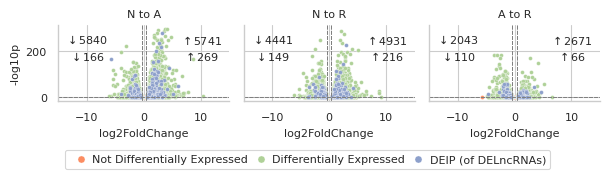

In [50]:
# Define a dictionary for title mapping
title_mapping = {
    "Normoxia to Anoxia": "N to A",
    "Normoxia to Reoxygenation": "N to R",
    "Anoxia to Reoxygenation": "A to R"
}

# create subplot for 3 plots 
sns.set_theme(style = 'whitegrid', palette='colorblind', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})

g = sns.FacetGrid(deg, col="condition", hue='color', palette=['#FC8D62', '#AFD198', '#8DA0CB'], height=((4)/2.54), aspect=(18/4.5)/3, 
    hue_order=['Not Differentially Expressed', 'Differentially Expressed', 'DEIP (of DELncRNAs)'])
g.refline(y=-np.log10(p_threshold), linestyle='--', linewidth=0.7, color='grey')
g.refline(x = np.log2(fold_threshold), linestyle='--', linewidth=0.7, color='grey')
g.refline(x = -np.log2(fold_threshold), linestyle='--', linewidth=0.7, color='grey')
g.map(sns.scatterplot, 'log2FoldChange','-log10p', s=8, rasterized=True)
g.add_legend(title='', fontsize=8, loc='upper center', borderaxespad=0.1, ncol=3, bbox_to_anchor=(.28, 0.02), frameon=True, markerscale=1.8, 
            columnspacing=0.2, scatteryoffsets=[0.5], handletextpad=0.01)
g.set(xlim=(-15, 15))

g.set_titles(col_template="{col_name}", fontsize=8)

# Update the subplot titles based on the mapping
for ax in g.axes.flat:
    current_title = ax.get_title()
    # Extract the current column name from the title and map it to the new title
    ax.set_title(title_mapping.get(current_title, current_title), fontsize=8)

g.map_dataframe(add_deg_number)

g.tight_layout()
# save as png
g.savefig('vulcano_DEInteraction_Partnerf_ofDElncRNAs_genes.svg', dpi=500)
plt.show()

In [41]:
# Filter to only keep the DE Interaction Partners (of DELncRNAs)
degip = deg.loc[deg['color'] == 'DEIP (of DELncRNAs)']
# export the gene_id column to a txt file
degip['gene_id'].to_csv('10_3_deg_lncRNA_interactionpartners/gene_id_degip.csv', index=False)


In [42]:
len(degip['gene_id'].unique())

567

In [43]:
# export the gene_id column to a txt file
pd.Series(degip['gene_id'].unique(), name='gene_id').to_csv('10_3_deg_lncRNA_interactionpartners/gene_id_degip.csv', index=False)

In [44]:
degip

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,regulation,condition,-log10p,color
69,ccar_ub01-g23359,67.522493,1.210783,0.187746,4.432971,9.294341e-06,4.805916e-05,up,Normoxia to Anoxia,4.318224,DEIP (of DELncRNAs)
117,ccar_ub01-g23413,1208.581829,0.864768,0.057716,8.425044,3.606144e-17,4.470204e-16,up,Normoxia to Anoxia,15.349673,DEIP (of DELncRNAs)
126,ccar_ub01-g23422,2503.826482,0.869622,0.046218,10.625858,2.259241e-26,4.511801e-25,up,Normoxia to Anoxia,24.345650,DEIP (of DELncRNAs)
136,ccar_ub01-g23432,1717.015998,0.588879,0.054128,3.886492,1.017034e-04,4.645683e-04,up,Normoxia to Anoxia,3.332950,DEIP (of DELncRNAs)
237,ccar_ub01-g23540,780.116679,0.850382,0.064850,7.276353,3.429656e-13,3.298115e-12,up,Normoxia to Anoxia,11.481734,DEIP (of DELncRNAs)
...,...,...,...,...,...,...,...,...,...,...,...
39325,ccar_ua25-g22614,336.265839,-0.588080,0.068473,-3.060594,2.208984e-03,1.952170e-02,up,Anoxia to Reoxygenation,1.709482,DEIP (of DELncRNAs)
39636,ccar_ua25-g22940,17.805516,1.530533,0.309489,3.722329,1.973932e-04,2.229471e-03,up,Anoxia to Reoxygenation,2.651798,DEIP (of DELncRNAs)
40048,ccar_ub25-g44840,865.636950,0.900186,0.055775,9.353232,8.500913e-21,6.196113e-19,up,Anoxia to Reoxygenation,18.207881,DEIP (of DELncRNAs)
40473,ccar_ub25-g45312,213.117635,-1.573943,0.329528,-3.627712,2.859437e-04,3.106735e-03,up,Anoxia to Reoxygenation,2.507696,DEIP (of DELncRNAs)


# 4 Identify the top5 DEinteraction Partners (of DELncRNAs) with the lowest padj and the biggest log2FoldCHange

In [45]:
# First, sort by `padj` in ascending order and then by absolute `log2FoldChange` in descending order
sorted_degip = degip.sort_values(by=['padj', 'log2FoldChange'], ascending=[True, False])

# Get the top 5 rows from the sorted dataframe
top_5_hits = sorted_degip.head(5)

# Print the top 5 hits
print(top_5_hits)

                gene_id      baseMean  log2FoldChange     lfcSE       stat  \
3176    ccar_ua02-g2594  10163.868288        4.532602  0.078665  52.807552   
17337  ccar_ub10-g33126    732.882467        3.231236  0.079250  35.996597   
18957  ccar_ua11-g11216    737.320652        2.672980  0.069436  33.044415   
3176    ccar_ua02-g2594  10163.868288        2.938796  0.078856  32.467663   
13777   ccar_ua08-g8194    993.275517        3.067239  0.084807  31.704011   

              pvalue           padj regulation                  condition  \
3176    0.000000e+00   0.000000e+00         up         Normoxia to Anoxia   
17337  9.456329e-284  1.638042e-280         up         Normoxia to Anoxia   
18957  1.871232e-239  2.070882e-236         up         Normoxia to Anoxia   
3176   3.051447e-231  1.519659e-227         up  Normoxia to Reoxygenation   
13777  1.367979e-220  1.238674e-217         up         Normoxia to Anoxia   

          -log10p                color  
3176          inf  DEIP (of